In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz

In [269]:
# def get_acf(tau,f1,f2):
#     if tau[0]<1e-10:
#         s1,c1=sici(2*np.pi*f1*tau[1:])
#         s2,c2=sici(2*np.pi*f2*tau[1:])
#         return np.hstack([np.log(f2/f1),c2-c1])
#     s1,c1=sici(2*np.pi*f1*tau[1:])
#     s2,c2=sici(2*np.pi*f2*tau[1:])
#     return c2-c1
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    y=c2-c1
    y=np.nan_to_num(y,nan=np.log(f2/f1)+1e-3)
    return y

In [221]:
N=2*1000

In [270]:
taus=np.fft.fftfreq(N)*N
print(taus)
f2=0.5
f1=0.1
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)
acf1=np.hstack([np.log(f2/f1),acf1])

[ 0.  1.  2. ... -3. -2. -1.]
200.0 1000.0


In [224]:
get_acf(taus,f1,f2)

/tmp/ipykernel_3397421/1297750139.py:12: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


array([ 1.60943791,  0.058247  , -0.45851453, ..., -0.43383342,
       -0.45851453,  0.058247  ])

In [160]:
acf1

array([ 1.60943791,  0.058247  , -0.45851453, ..., -0.43383342,
       -0.45851453,  0.058247  ])

In [5]:
acf1[N//2]

0.0009943527239186958

In [109]:
taus2=np.linspace(0,N//2,N//2*10+1)

In [116]:
acf2=get_acf(taus2[1:],f1,f2)
acf2=np.hstack([10*np.log(f2/f1),10*acf2])

(0.0, 10.0)

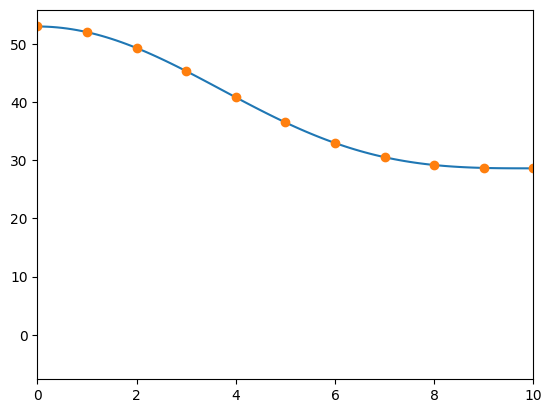

In [124]:
plt.plot(taus2[:N//2],acf2[:N//2])
plt.plot(taus[:N//2],acf1[:N//2],'o')
plt.xlim(0,10)

In [34]:
ps=np.fft.rfft(acf1-np.mean(acf1))

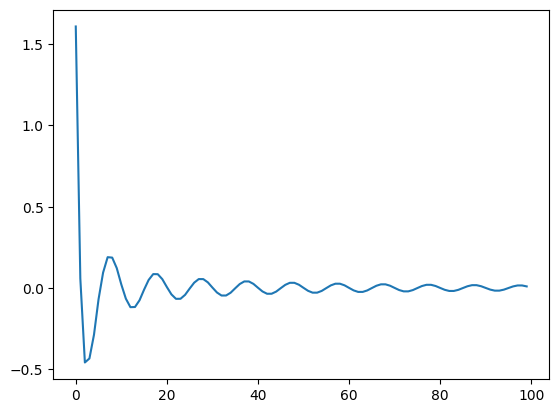

In [41]:
plt.plot(acf1[:100])

In [33]:
acf1[N//2]

1.0030791030315561e-07

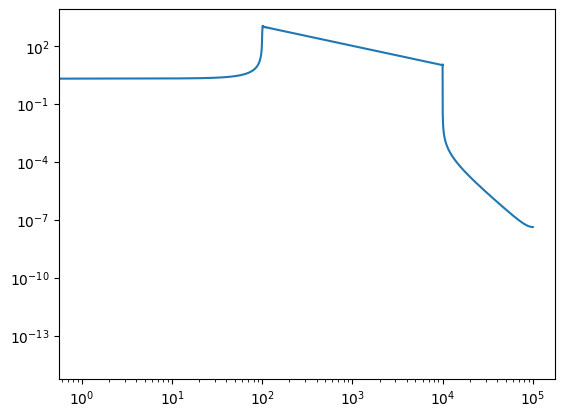

In [36]:
plt.loglog(np.abs(ps))

In [8]:
f1*N, f2*N

(100.0, 1000.0)

In [5]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1)
acf_dft=np.fft.irfft(ps)

(0.0, 10.0)

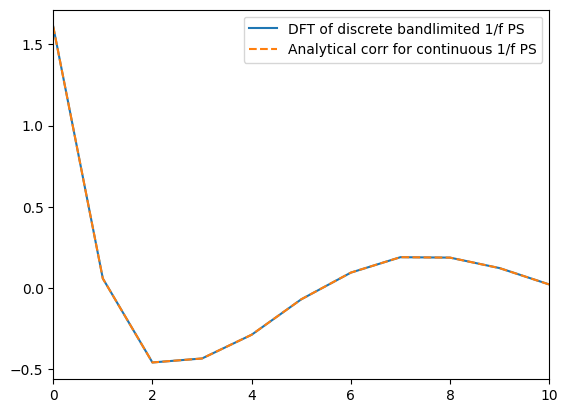

In [6]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1,ls='--', label='Analytical corr for continuous 1/f PS')
plt.legend()
plt.xlim(0,10)

In [275]:
acf1=get_acf(taus,f1,f2)
print(acf1)

[ 1.61043791  0.058247   -0.45851453 ... -0.43383342 -0.45851453
  0.058247  ]


/tmp/ipykernel_3397421/1944529460.py:12: RuntimeWarning: invalid value encountered in subtract
  y=c2-c1


In [366]:
C=toeplitz(acf1[:N//2])
# C+=np.ones(C.shape,dtype='float64')*10000
Cinv=np.linalg.inv(C)

In [367]:
npoints=1000
dtaus=np.arange(1,npoints+1)/npoints
coeff_arr = np.zeros((len(dtaus),N//2))
my_tau = taus[:N//2].copy()

In [ ]:
dtaus[

In [378]:
dtaus[99::100]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [368]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtau
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [11]:
u,s,vT=np.linalg.svd(coeff_arr)

In [365]:
np.sum(coeff_arr,axis=1)

array([ 9.42918521e-11,  9.24465504e-11,  9.04668562e-11,  8.85580498e-11,
        8.66247629e-11,  8.47742987e-11,  8.28069280e-11,  8.08846323e-11,
        7.88704657e-11,  7.69729835e-11,  7.50209894e-11,  7.31089633e-11,
        7.11737891e-11,  6.91800506e-11,  6.72901734e-11,  6.52903287e-11,
        6.32967567e-11,  6.13233908e-11,  5.93132210e-11,  5.73926462e-11,
        5.54649104e-11,  5.33701972e-11,  5.14410736e-11,  4.94300989e-11,
        4.74241202e-11,  4.53953819e-11,  4.34062231e-11,  4.12921919e-11,
        3.93667321e-11,  3.73620579e-11,  3.53512775e-11,  3.33064132e-11,
        3.13358228e-11,  2.92662006e-11,  2.71569434e-11,  2.51719617e-11,
        2.31206582e-11,  2.10320233e-11,  1.90648608e-11,  1.69751435e-11,
        1.48857870e-11,  1.28150060e-11,  1.07207576e-11,  8.70557099e-12,
        6.62782329e-12,  4.59309674e-12,  2.52607484e-12,  3.83121486e-13,
       -1.71578897e-12, -3.73543210e-12, -5.93809724e-12, -8.00499944e-12,
       -1.01068737e-11, -

In [369]:
np.sum(coeff_arr,axis=1)

array([ 9.31713715e-01,  9.12773981e-01,  8.93794581e-01,  8.74775581e-01,
        8.55717049e-01,  8.36619051e-01,  8.17481655e-01,  7.98304929e-01,
        7.79088942e-01,  7.59833761e-01,  7.40539457e-01,  7.21206097e-01,
        7.01833751e-01,  6.82422490e-01,  6.62972382e-01,  6.43483499e-01,
        6.23955910e-01,  6.04389687e-01,  5.84784901e-01,  5.65141624e-01,
        5.45459927e-01,  5.25739882e-01,  5.05981562e-01,  4.86185039e-01,
        4.66350386e-01,  4.46477677e-01,  4.26566985e-01,  4.06618384e-01,
        3.86631949e-01,  3.66607752e-01,  3.46545870e-01,  3.26446377e-01,
        3.06309349e-01,  2.86134861e-01,  2.65922989e-01,  2.45673809e-01,
        2.25387398e-01,  2.05063832e-01,  1.84703189e-01,  1.64305545e-01,
        1.43870979e-01,  1.23399568e-01,  1.02891391e-01,  8.23465260e-02,
        6.17650516e-02,  4.11470469e-02,  2.04925915e-02, -1.98235176e-04,
       -2.09253531e-02, -4.16886821e-02, -6.24881418e-02, -8.33236512e-02,
       -1.04195129e-01, -

In [290]:
u1,s1,vT1=np.linalg.svd(coeff_arr)

Text(0, 0.5, 'Cost ~FLOPS')

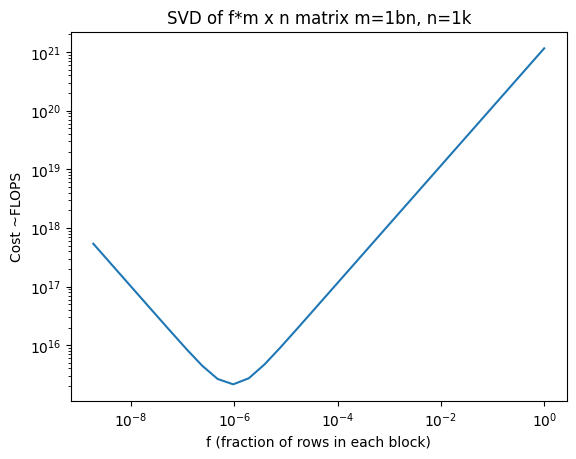

In [75]:
n=1000
m=1<<30
frac=2.**np.arange(-29,1)
a=frac*m
p=1/frac
svd_cost=p*(n*a**2+n**3)
plt.loglog(frac,svd_cost)
plt.title("SVD of f*m x n matrix m=1bn, n=1k")
plt.xlabel("f (fraction of rows in each block)")
plt.ylabel("Cost ~FLOPS")

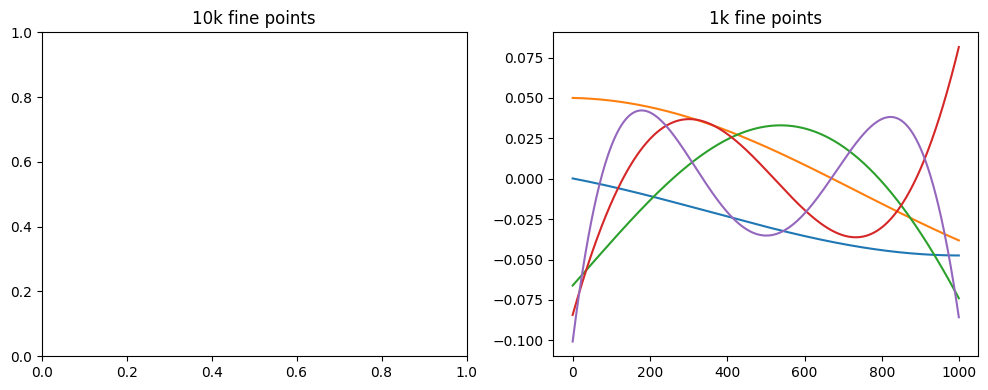

In [291]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.title("10k fine points")
# plt.plot(u[:,:5])
plt.subplot(122)
plt.title("1k fine points")
plt.plot(u1[:,:5])
plt.tight_layout()

Text(0.5, 0, 'predicted point')

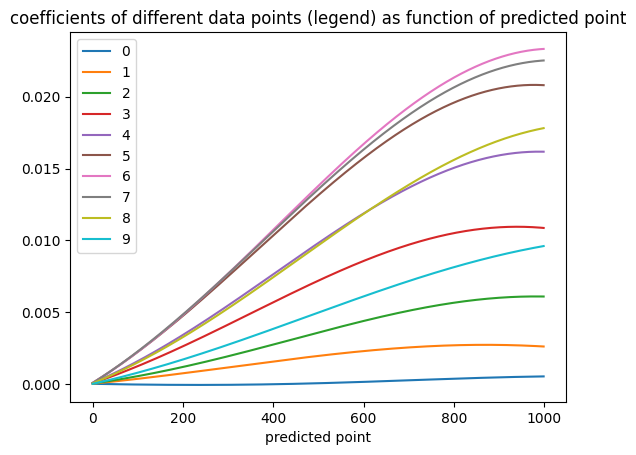

In [325]:
plt.plot(coeff_arr[:,0:10],label=[0,1,2,3,4,5,6,7,8,9])
plt.legend()
plt.title("coefficients of different data points (legend) as function of predicted point")
plt.xlabel("predicted point")
# plt.xlim(0,10)

In [326]:
s1

array([1.87849542e+02, 1.93244585e+01, 3.59386909e+00, 7.22800784e-01,
       3.98064034e-02, 2.13338593e-03, 1.34337837e-04, 7.38137923e-06,
       1.40772347e-07, 8.35978124e-09, 2.54828528e-10, 1.13991228e-11,
       1.01330845e-11, 9.87113810e-12, 7.93199348e-12, 5.77004247e-12,
       5.34047531e-12, 5.30287111e-12, 5.02884871e-12, 5.00432562e-12,
       4.98936044e-12, 3.96126392e-12, 3.52902787e-12, 3.09529571e-12,
       2.85988618e-12, 2.80113772e-12, 2.47543100e-12, 2.41367929e-12,
       2.20218877e-12, 2.14752468e-12, 2.12866973e-12, 2.05115398e-12,
       2.03695862e-12, 1.97345229e-12, 1.87420637e-12, 1.85453264e-12,
       1.82750932e-12, 1.72764419e-12, 1.69533685e-12, 1.61873744e-12,
       1.58642084e-12, 1.43855279e-12, 1.41494213e-12, 1.36110828e-12,
       1.34458099e-12, 1.25232504e-12, 1.24913659e-12, 1.20966971e-12,
       1.17778686e-12, 1.11437963e-12, 1.08272946e-12, 1.06777874e-12,
       1.06594109e-12, 1.03136544e-12, 1.03085775e-12, 1.00637082e-12,
      

In [328]:
s1[:5]/s1[0]

array([1.00000000e+00, 1.02872002e-01, 1.91316361e-02, 3.84776441e-03,
       2.11905778e-04])

In [334]:
u1.shape

(1000, 1000)

[-2.76328423e-02 -2.63850855e-02  4.03681687e-03  2.61951918e-03
 -6.87253624e-05 -6.68647592e-05  5.91716392e-07  8.42751614e-07
 -3.37688547e-09]
[ 1.49607688e-02 -4.76107698e-02 -9.40916431e-03  3.62659825e-03
  3.62432265e-04 -9.52808246e-05 -5.70283900e-06  1.27466230e-06
  5.12593901e-08]
[-3.54787938e-03  4.59650807e-03 -6.94435552e-02 -8.75118974e-03
  3.01717622e-03  2.31929722e-04 -5.17245936e-05 -2.37947646e-06
  5.03491114e-07]
[-1.58974487e-04  3.15639292e-03 -6.93323808e-03  8.26776496e-02
  5.84679537e-03 -3.01562308e-03 -1.57619227e-04  4.48810153e-05
  1.80133701e-06]
[ 4.55965889e-05  1.71759110e-04 -2.23498196e-03  4.90316688e-03
 -9.42196801e-02  2.52448612e-03  3.19809529e-03 -8.93226171e-05
 -4.31767099e-05]


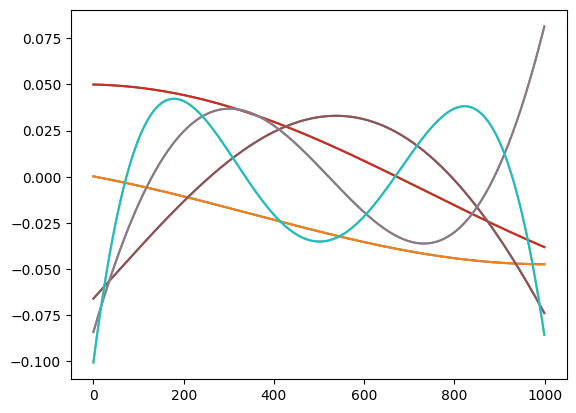

In [333]:
for i in range(5):
    colnum=i
    legcoeff=np.linalg.pinv(np.polynomial.legendre.legvander(np.linspace(-1,1,1000),8))@u1[:,colnum]
    print(legcoeff)
    plt.plot(np.polynomial.legendre.legval(np.linspace(-1,1,1000),legcoeff))
    plt.plot(u1[:,colnum])

In [327]:
s1

array([1.87849542e+02, 1.93244585e+01, 3.59386909e+00, 7.22800784e-01,
       3.98064034e-02, 2.13338593e-03, 1.34337837e-04, 7.38137923e-06,
       1.40772347e-07, 8.35978124e-09, 2.54828528e-10, 1.13991228e-11,
       1.01330845e-11, 9.87113810e-12, 7.93199348e-12, 5.77004247e-12,
       5.34047531e-12, 5.30287111e-12, 5.02884871e-12, 5.00432562e-12,
       4.98936044e-12, 3.96126392e-12, 3.52902787e-12, 3.09529571e-12,
       2.85988618e-12, 2.80113772e-12, 2.47543100e-12, 2.41367929e-12,
       2.20218877e-12, 2.14752468e-12, 2.12866973e-12, 2.05115398e-12,
       2.03695862e-12, 1.97345229e-12, 1.87420637e-12, 1.85453264e-12,
       1.82750932e-12, 1.72764419e-12, 1.69533685e-12, 1.61873744e-12,
       1.58642084e-12, 1.43855279e-12, 1.41494213e-12, 1.36110828e-12,
       1.34458099e-12, 1.25232504e-12, 1.24913659e-12, 1.20966971e-12,
       1.17778686e-12, 1.11437963e-12, 1.08272946e-12, 1.06777874e-12,
       1.06594109e-12, 1.03136544e-12, 1.03085775e-12, 1.00637082e-12,
      

In [129]:
np.sum(legcoeff)

0.04482472857621932

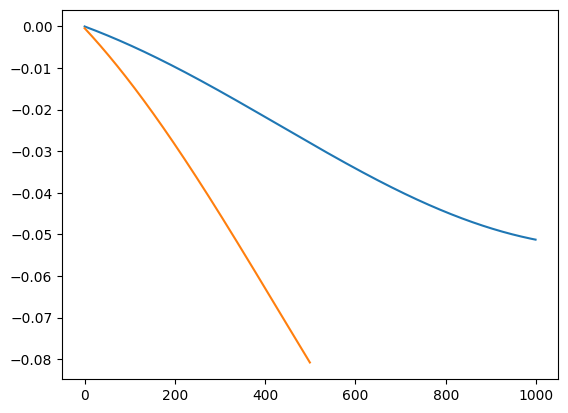

In [131]:
plt.plot(u[:,0])
plt.plot(u1[:,0])

In [130]:
s

array([5.42258890e+02, 1.96952682e+01, 4.78465240e+00, 7.82745331e-01,
       4.50496162e-02, 1.96166138e-03, 1.39144248e-04, 7.95126229e-06,
       1.68651558e-07, 5.37860687e-09, 2.67116320e-10, 1.14313482e-10,
       8.80576852e-11, 7.53985330e-11, 5.47157450e-11, 3.95466330e-11,
       3.70122952e-11, 3.16560964e-11, 2.65206183e-11, 2.20514887e-11,
       1.99347751e-11, 1.85257963e-11, 1.73861301e-11, 1.65762127e-11,
       1.55440922e-11, 1.49823341e-11, 1.47048707e-11, 1.43419577e-11,
       1.37013814e-11, 1.35978897e-11, 1.25375109e-11, 1.22626216e-11,
       1.22048400e-11, 1.07916767e-11, 1.01153208e-11, 9.68471422e-12,
       9.32712978e-12, 9.07023199e-12, 8.76313197e-12, 8.50320957e-12,
       7.83043988e-12, 7.16528425e-12, 6.93374251e-12, 6.81801436e-12,
       6.66703930e-12, 6.57252227e-12, 6.22818409e-12, 5.83813136e-12,
       5.76622472e-12, 5.52600693e-12, 5.01441825e-12, 4.93907435e-12,
       4.64968680e-12, 4.62393522e-12, 4.58174060e-12, 4.34749167e-12,
      